# Input data to the NN

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

# Get train and test data from mnist server. Then transform those data into tensor format.

In [2]:
train = datasets.MNIST("data", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("data", train=False, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

# Load those tensor data into torch objects

In [4]:
train_set = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [8]:
# Taking a look at our batch data
for data in train_set:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [12]:
# data has the format: [tensor-of-images, tensor-of-labels]:list
image, label = data[0][0], data[1][0]
print(label)

tensor(5)


In [13]:
import matplotlib.pyplot as plt

print(image.shape)

# Notice that image is of shape [1, 28, 28]. This is not the format of a grayscale image.
# Therefore, we will not be able to plot the image as is.

# plt.imshow(image)

torch.Size([1, 28, 28])


# Therefore, to see the image, we need to use view() method to reshape the image tensor into a typical image format.

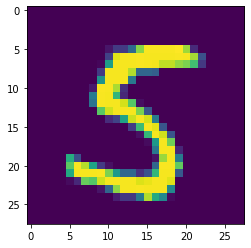

In [17]:
image = image.view(28, 28)
plt.imshow(image)

# Important: we want our data set to be as balanced as possible across various categories. If the data set is skewed towards a particular category, OUR MODEL WILL QUICKLY GRADIENT DESCENT INTO ALWAYS PREDICTING THAT CATEGORY. IT WILL BE VERY DIFFICULT FOR OUR MODEL TO GET AROUND THAT.

In [29]:
# Check to see how balanced our TRAINING DATA is.
counter = [0] * 10
for data in train_set:
    y = data[1][0]
    counter[y] += 1

total = sum(counter)
for i in range(10):
    counter[i] = counter[i] * 100 / total
    
print(counter)

[9.666666666666666, 10.833333333333334, 9.4, 10.25, 9.55, 9.166666666666666, 10.066666666666666, 10.033333333333333, 10.316666666666666, 10.716666666666667]
